In [3]:
from complex_mode_overlap import *
import numpy as np

# loading, reshaping, clipping COMSOL .dat

In [125]:
dat_fiber, param_fiber = loadData('../normE_fiber2.dat')
dat, param_list = loadData('../normE_all11.dat')


In [149]:
def plotComplexData1(dat, param_list, bound=2000, scale=1, res=500j):
             
    """handles norm E, complex Ex and Ey, loops through param list"""

    for i in range(len(param_list)): 
        x,y,z = datToxyz(dat,i)

        values, corners = cropData(x, y, z, bound, scale, res)    

        if i%4 == 0:

            fig, axs = plt.subplots(nrows=1, ncols=7, figsize=(10,2))
            fig.suptitle("w="+str(param_list[i])+
            ':norm(E), Re(Ex), Im(Ex), Re(Ey), Im(Ey), Re(Ez), Im(Ez)')
            axs[0].imshow(np.real(values), origin='lower', extent=corners.tolist(),
                    aspect='equal', cmap=plt.get_cmap('Greens'))
  
        elif i%4 == 1:
            axs[1].imshow(np.real(values), origin='lower', extent=corners.tolist(),
                    aspect='equal', cmap=plt.get_cmap('bwr'))
                
            axs[2].imshow(np.imag(values), origin='lower', extent=corners.tolist(),
                    aspect='equal', cmap=plt.get_cmap('bwr'))

            axs[1].set_yticklabels([])
            axs[2].set_yticklabels([])
            
        elif i%4 == 2:
            axs[3].imshow(np.real(values), origin='lower', extent=corners.tolist(),
                    aspect='equal', cmap=plt.get_cmap('bwr'))
                
            axs[4].imshow(np.imag(values), origin='lower', extent=corners.tolist(),
                    aspect='equal', cmap=plt.get_cmap('bwr'))

            axs[3].set_yticklabels([])
            axs[4].set_yticklabels([])

        elif i%4 == 3:
            axs[5].imshow(np.real(values), origin='lower', extent=corners.tolist(),
                    aspect='equal', cmap=plt.get_cmap('bwr'))
                
            axs[6].imshow(np.imag(values), origin='lower', extent=corners.tolist(),
                    aspect='equal', cmap=plt.get_cmap('bwr'))

            axs[5].set_yticklabels([])
            axs[6].set_yticklabels([])

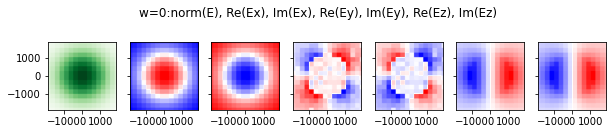

In [150]:
plotComplexData1(dat_fiber, range(4), bound=2000)

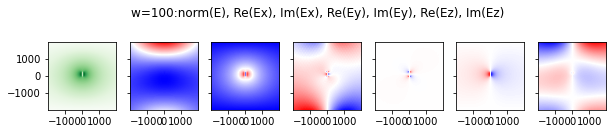

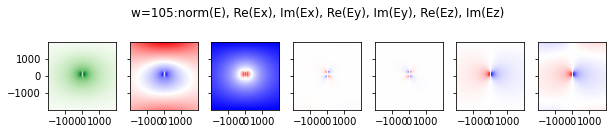

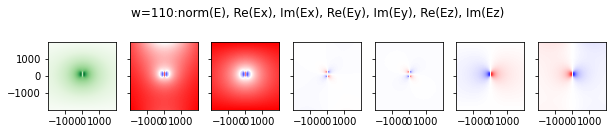

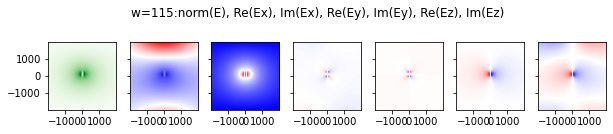

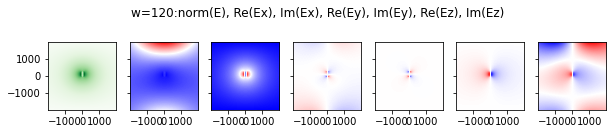

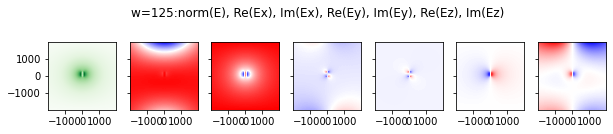

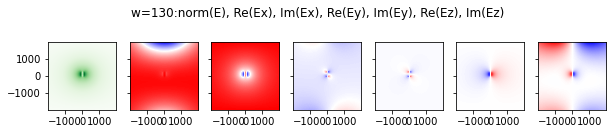

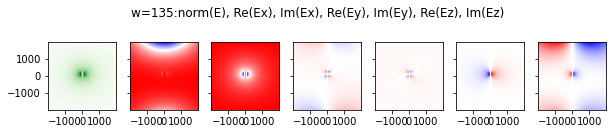

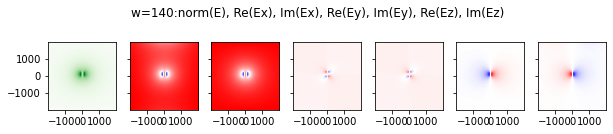

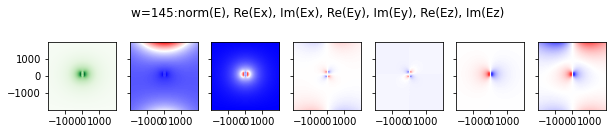

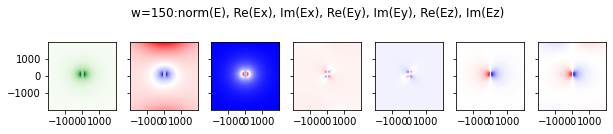

In [152]:
plotComplexData1(dat, param_list, bound=2000)

In [170]:
def dattoxyComplex(dat, n_param, n_dim = 3):
    
    x = np.real(dat[:, 0]); y = np.real(dat[:, 1])

    (m,n)   = np.shape(dat)
    z = np.reshape(dat[:,2:],(m,n_param,n_dim+1))

    return x, y, z

def getComplexCorrelation(E_ref, E_i, i):

        xc = 0j*np.zeros(np.shape(E_ref[:,:,0,1]))

        for j in [1,2,3]:
            xc += signal.correlate2d(
                np.conj(E_ref[:,:,0,j]), E_i[:,:,i,j]
                , mode="same", boundary='wrap')

        xc_norm = np.abs(xc)**2/np.sum(E_ref[:,:,0,0]**2)/np.sum(E_i[:,:,i,0]**2)

        return np.real(xc_norm)

def convolveComplex1(dat_ref, dat, param_list,
                 bound=2000, scale = 1,
                 res=100j, plotflag1 = False,
                 plotflag2=True, fitflag= False,
                 i=0):

    param_list = np.unique(np.array(param_list,dtype=float))

    xref, yref, zref = dattoxyComplex(dat_ref, 1)
    values_ref, corners_ref = cropData(xref, yref, zref, bound,scale,res)   
    #values dimension: (res, res, 1, 3)

    n_param = len(param_list); xclist = []; xcpeaks = []

    x, y, z   = dattoxyComplex(dat, n_param)
    values, corners = cropData(x, y, z, bound, scale, res)
    #values dimension: (res, res, n_param, 3)

    for i in range(n_param):
               
        xc_norm = getComplexCorrelation(values_ref, values, i)

        if fitflag:
            normpeak, xcfit = fitCorrelation(xc_norm)
        else:
            normpeak = np.max(xc_norm)
            xcfit = []

        xclist.append(xc_norm)
        xcpeaks.append(normpeak)

        if plotflag1:
            plotCorr2D(xc_norm, xcfit, corners, fitflag)

    if plotflag2:
        plotCorrvsparams(param_list, xcpeaks)

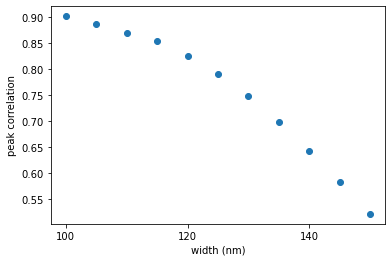

In [171]:
convolveComplex1(dat_fiber, dat, param_list,
                 bound=2000, scale = 1,
                 res=100j, plotflag1 = False,
                 plotflag2=True, fitflag= False,
                 i=0)

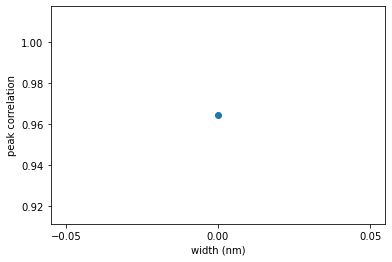

In [172]:
convolveComplex1(dat_fiber, dat_fiber, [0],
                 bound=2000, scale = 1,
                 res=100j, plotflag1 = False,
                 plotflag2=True, fitflag= False,
                 i=0)

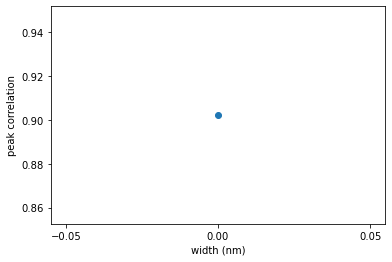

In [174]:
convolveComplex1(dat[:,:6], dat_fiber, [0],
                 bound=2000, scale = 1,
                 res=100j, plotflag1 = False,
                 plotflag2=True, fitflag= False,
                 i=0)

In [167]:
np.shape(dat_fiber)

(250000, 6)

In [162]:
np.shape(dat[:,:6])

(250000, 6)